# TASK #2: IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from jupyterthemes import jtplot
# jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [2]:
# Load the data
tweets_df = pd.read_csv('dataset.csv')

In [3]:
tweets_df = tweets_df[1:33000]
tweets_df

tweet  bullying
1      anti greek nationalis wikipedia hi alexikoua y...         1
2               dis hoe wasnt dis violent lottery ticket         1
3       better atabay helping banned vandals pushing pov         0
4      camelcase sicko camelcase camelcase rule r bal...         0
5      hi requested arbitration wikipedia requests ar...         0
...                                                  ...       ...
32995  proposition ya hey got propositon heres deal i...         0
32996     suggest report administrator wp request blocks         0
32997  still talking animals know asian folks would l...         1
32998  find extremely alarming someone would remove q...         0
32999  tha wats happening made message board go back ...         0

[32999 rows x 2 columns]

In [4]:
# Display the data info
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32999 entries, 1 to 32999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet     32984 non-null  object
 1   bullying  32999 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 515.7+ KB


In [5]:
# Diplay data description
tweets_df.describe()

bullying
count  32999.000000
mean       0.201067
std        0.400804
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000

In [6]:
# Display the contents of the 'tweet' column
tweets_df['tweet']

1        anti greek nationalis wikipedia hi alexikoua y...
2                 dis hoe wasnt dis violent lottery ticket
3         better atabay helping banned vandals pushing pov
4        camelcase sicko camelcase camelcase rule r bal...
5        hi requested arbitration wikipedia requests ar...
                               ...                        
32995    proposition ya hey got propositon heres deal i...
32996       suggest report administrator wp request blocks
32997    still talking animals know asian folks would l...
32998    find extremely alarming someone would remove q...
32999    tha wats happening made message board go back ...
Name: tweet, Length: 32999, dtype: object

In [7]:
# dropna() is used to drop rows or clumns with null values
tweets_df = tweets_df.dropna()

In [8]:
tweets_df

tweet  bullying
1      anti greek nationalis wikipedia hi alexikoua y...         1
2               dis hoe wasnt dis violent lottery ticket         1
3       better atabay helping banned vandals pushing pov         0
4      camelcase sicko camelcase camelcase rule r bal...         0
5      hi requested arbitration wikipedia requests ar...         0
...                                                  ...       ...
32995  proposition ya hey got propositon heres deal i...         0
32996     suggest report administrator wp request blocks         0
32997  still talking animals know asian folks would l...         1
32998  find extremely alarming someone would remove q...         0
32999  tha wats happening made message board go back ...         0

[32984 rows x 2 columns]

# TASK #3: EXPLORE DATASET

<AxesSubplot:>

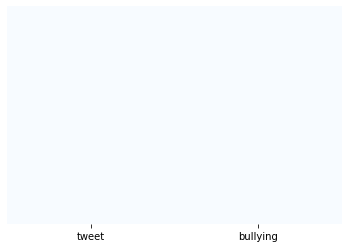

In [9]:
# Display heat map for null elements
sns.heatmap(tweets_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

array([[<AxesSubplot:title={'center':'bullying'}>]], dtype=object)

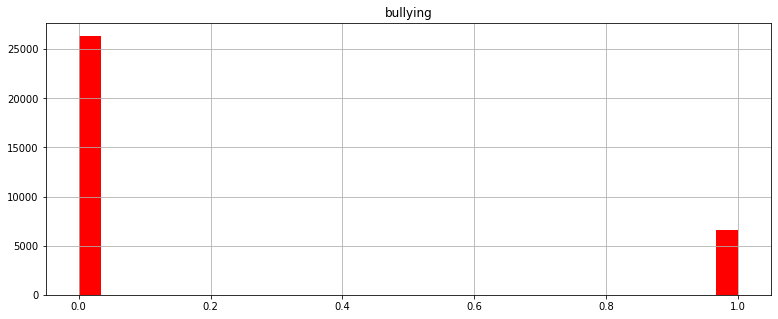

In [10]:
# To plot the histogram
tweets_df.hist(bins = 30, figsize = (13,5), color = 'r')

/home/pavan/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bullying', ylabel='count'>

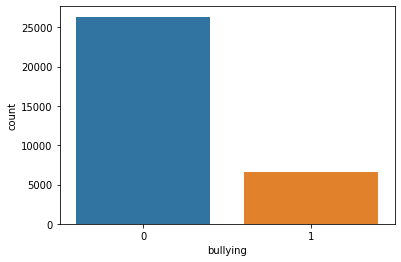

In [11]:
sns.countplot(tweets_df['bullying'], label = "Count") 

In [12]:
# To get the length of the messages
tweets_df['length'] = tweets_df['tweet'].apply(len)

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
# The length of each tweet is obtained and is stored in the column 'length'
tweets_df

tweet  bullying  length
1      anti greek nationalis wikipedia hi alexikoua y...         1     233
2               dis hoe wasnt dis violent lottery ticket         1      40
3       better atabay helping banned vandals pushing pov         0      48
4      camelcase sicko camelcase camelcase rule r bal...         0      70
5      hi requested arbitration wikipedia requests ar...         0     231
...                                                  ...       ...     ...
32995  proposition ya hey got propositon heres deal i...         0      67
32996     suggest report administrator wp request blocks         0      46
32997  still talking animals know asian folks would l...         1      74
32998  find extremely alarming someone would remove q...         0     124
32999  tha wats happening made message board go back ...         0     100

[32984 rows x 3 columns]

<AxesSubplot:ylabel='Frequency'>

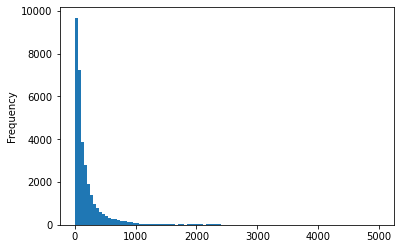

In [14]:
# Plotting histogram for the length of the tweets
tweets_df['length'].plot(bins=100, kind='hist') 

In [15]:
# Displays column description
tweets_df.describe()

bullying        length
count  32984.000000  32984.000000
mean       0.201158    215.164201
std        0.400872    355.637148
min        0.000000      3.000000
25%        0.000000     45.000000
50%        0.000000     98.000000
75%        0.000000    231.000000
max        1.000000   5000.000000

In [16]:
# To find the shortest message 
tweets_df[tweets_df['length'] == min(tweets_df['length'])]['tweet'].iloc[0]

'irc'

In [17]:
# To view cells with average length
tweets_df[tweets_df['length'] == tweets_df[['length']].mean(axis=1)]['tweet'].iloc[0]

'anti greek nationalis wikipedia hi alexikoua yous vandalise wikipedia editing false information may chauvinist edit false information wikipedia nowhere percent greeks albania real information census vandalise wikipedia militant ideas'

In [18]:
# Here we divide the data frame into 2 positive and negative positve are the ones with 'bullying' as 0 and 
# negative for 'bullying' with 1
positive = tweets_df[tweets_df['bullying']==0]

In [19]:
positive

tweet  bullying  length
3       better atabay helping banned vandals pushing pov         0      48
4      camelcase sicko camelcase camelcase rule r bal...         0      70
5      hi requested arbitration wikipedia requests ar...         0     231
6      nonetheless lactose hemiacetal group e g sucro...         0      73
7      revert much want never say permission attack l...         0      52
...                                                  ...       ...     ...
32994               bold text headline text phill smells         0      36
32995  proposition ya hey got propositon heres deal i...         0      67
32996     suggest report administrator wp request blocks         0      46
32998  find extremely alarming someone would remove q...         0     124
32999  tha wats happening made message board go back ...         0     100

[26349 rows x 3 columns]

In [20]:
negative = tweets_df[tweets_df['bullying']==1]

In [21]:
negative

tweet  bullying  length
1      anti greek nationalis wikipedia hi alexikoua y...         1     233
2               dis hoe wasnt dis violent lottery ticket         1      40
8                       yo bag gucci still ugly hoe shut         1      32
21     love family even need water pop red pill hoe g...         1      66
23                  kitten dose look like bastard fucker         1      36
...                                                  ...       ...     ...
32979               shut king bee stupid idiot vandalism         1      36
32984  never gonna ok nigga around alot bitches boys ...         1      67
32986                                    got body faggot         1      15
32987      duck face result walking pole tweeting retard         1      45
32997  still talking animals know asian folks would l...         1      74

[6635 rows x 3 columns]

# TASK #4: PLOT THE WORDCLOUD

In [22]:
# Converting all the tweets to a list
sentences = tweets_df['tweet'].tolist()
len(sentences)

32984

In [23]:
# Joining the list of tweets to one massive string
sentences_as_one_string =" ".join(sentences)

In [24]:
sentences_as_one_string

'anti greek nationalis wikipedia hi alexikoua yous vandalise wikipedia editing false information may chauvinist edit false information wikipedia nowhere percent greeks albania real information census vandalise wikipedia militant ideas dis hoe wasnt dis violent lottery ticket better atabay helping banned vandals pushing pov camelcase sicko camelcase camelcase rule r baley mentions inapplicable hi requested arbitration wikipedia requests arbitration trey stone davenbelle wikipedia requests arbitration trey stone davenbelle evidence mentioned evidence presented bringing attention comments evidence welcome sincerely may utc nonetheless lactose hemiacetal group e g sucrose trehalose locked acetals revert much want never say permission attack lebanon yo bag gucci still ugly hoe shut thanks would used ping thanks include sentiments appreciate time took add much appreciated talk please testing sandbox thanks jul utc scott fivelson hello believe made considerable progress adding credibility sco

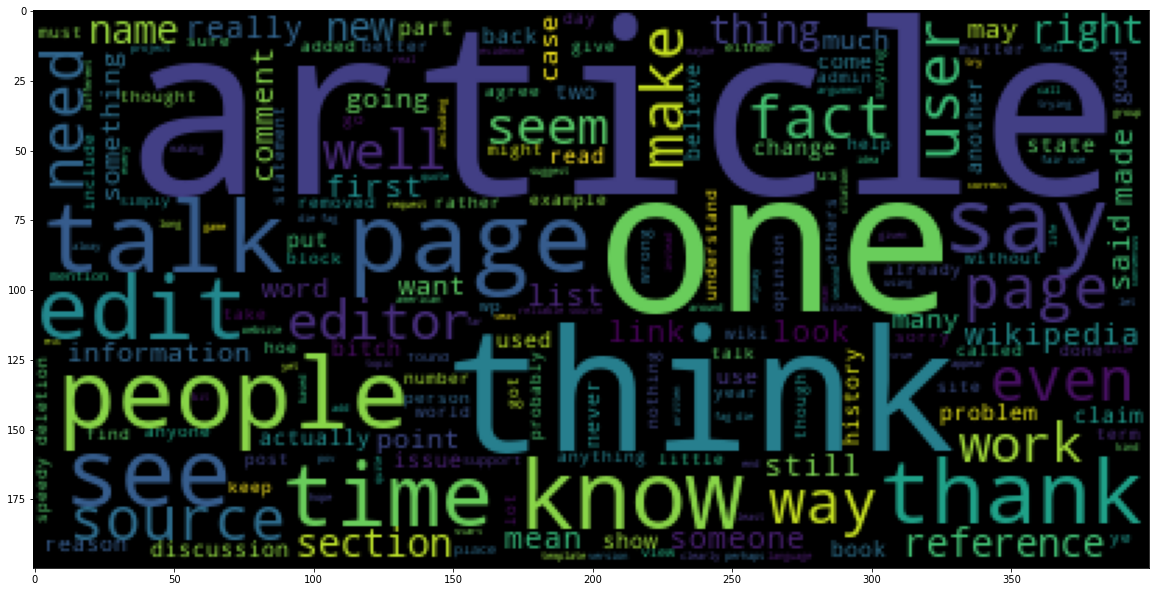

In [25]:
# Plotting the word cloud
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

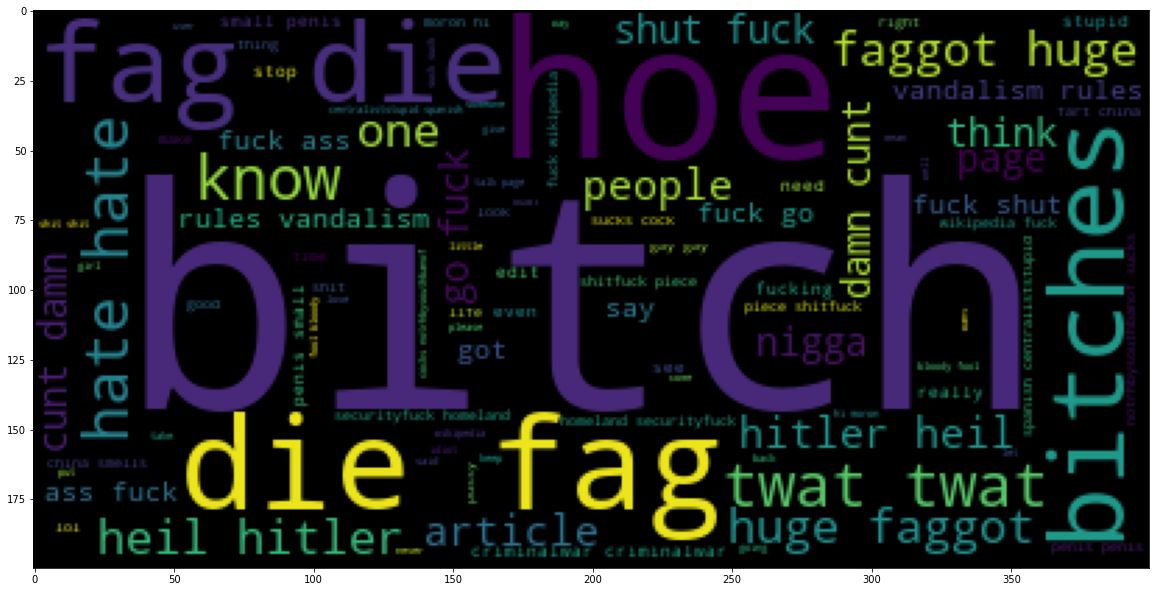

In [26]:
# Plotting the wordcloud of the "negative" dataframe. 
neg = negative['tweet'].tolist()
negsentence = " ".join(neg)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negsentence))


# TASK #5: PERFORM DATA CLEANING - REMOVE PUNCTUATION FROM TEXT

In [27]:
import string
string.punctuation
# Lists all the punctuators

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
Test = 'Good morning beautiful people :)... I am having fun learning Machine learning and AI!!'

In [29]:
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed
# Lists the characters of the string Test which is not a punctuator

['G',
 'o',
 'o',
 'd',
 ' ',
 'm',
 'o',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'b',
 'e',
 'a',
 'u',
 't',
 'i',
 'f',
 'u',
 'l',
 ' ',
 'p',
 'e',
 'o',
 'p',
 'l',
 'e',
 ' ',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 'h',
 'a',
 'v',
 'i',
 'n',
 'g',
 ' ',
 'f',
 'u',
 'n',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'M',
 'a',
 'c',
 'h',
 'i',
 'n',
 'e',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'A',
 'I']

In [30]:
# Join the characters again to form the string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join
# Joining the above list to one single string hence removing the punctuations

'Good morning beautiful people  I am having fun learning Machine learning and AI'

# TASK 6: PERFORM DATA CLEANING - REMOVE STOPWORDS

In [31]:
import nltk # Natural Language tool kit 

nltk.download('punkt')

/home/pavan/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1056)>


False

In [32]:
# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')
# To list all the english stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [33]:
Test_punc_removed_join

'Good morning beautiful people  I am having fun learning Machine learning and AI'

In [34]:
# To remove the stopwords
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

In [35]:
Test_punc_removed_join_clean # Only important (no so common) words are left

['Good',
 'morning',
 'beautiful',
 'people',
 'fun',
 'learning',
 'Machine',
 'learning',
 'AI']

# TASK 7: PERFORM TFIDF VECTORIZATION (TOKENIZATION)

In [36]:
#Perform tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents
text = ["Aman is a data scientist in India","This is unfold data science","Data Science is a promising career"]
vectorizer = TfidfVectorizer()
Y = vectorizer.fit_transform(text)

In [37]:
print(vectorizer.get_feature_names())

['aman', 'career', 'data', 'in', 'india', 'is', 'promising', 'science', 'scientist', 'this', 'unfold']


In [38]:
print(Y.toarray())  

[[0.46138073 0.         0.27249889 0.46138073 0.46138073 0.27249889
  0.         0.         0.46138073 0.         0.        ]
 [0.         0.         0.32630952 0.         0.         0.32630952
  0.         0.42018292 0.         0.55249005 0.55249005]
 [0.         0.55249005 0.32630952 0.         0.         0.32630952
  0.55249005 0.42018292 0.         0.         0.        ]]


In [39]:
print(vectorizer.idf_)

[1.69314718 1.69314718 1.         1.69314718 1.69314718 1.
 1.69314718 1.28768207 1.69314718 1.69314718 1.69314718]


In [40]:
print(vectorizer.vocabulary_)

{'aman': 0, 'is': 5, 'data': 2, 'scientist': 8, 'in': 3, 'india': 4, 'this': 9, 'unfold': 10, 'science': 7, 'promising': 6, 'career': 1}


In [41]:
text_as_input = text[2]
text_as_input

'Data Science is a promising career'

In [42]:
vector = vectorizer.transform([text_as_input])

In [43]:
print(vector.toarray())

[[0.         0.55249005 0.32630952 0.         0.         0.32630952
  0.55249005 0.42018292 0.         0.         0.        ]]


# TASK #8: CHANGE MADE HERE, CORRECT EVERYWHERE

In [44]:
# Define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords
import re
from nltk.stem import WordNetLemmatizer

def message_cleaning(message):
    message = ' '.join(nltk.word_tokenize(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",message)))
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word.lower() for word in nltk.word_tokenize(Test_punc_removed_join) if word.lower() not in stopwords.words('english')]
    wordnet_lemmatizer = WordNetLemmatizer()
    lemma_list = [wordnet_lemmatizer.lemmatize(word) for word in Test_punc_removed_join_clean]
    return lemma_list

In [45]:
#Calling the message_cleaning function and applying it to all the tweets
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

In [46]:
# Shows the first 10 rows of cleaned up version
tweets_df_clean[1:10] 

2      [dis, hoe, wasnt, dis, violent, lottery, ticket]
3     [better, atabay, helping, banned, vandal, push...
4     [camelcase, sicko, camelcase, camelcase, rule,...
5     [hi, requested, arbitration, wikipedia, reques...
6     [nonetheless, lactose, hemiacetal, group, e, g...
7     [revert, much, want, never, say, permission, a...
8              [yo, bag, gucci, still, ugly, hoe, shut]
9     [thanks, would, used, ping, thanks, include, s...
10         [please, testing, sandbox, thanks, jul, utc]
Name: tweet, dtype: object

In [47]:
# Shows the original version for row 5
print(tweets_df['tweet'][5]) 

hi requested arbitration wikipedia requests arbitration trey stone davenbelle wikipedia requests arbitration trey stone davenbelle evidence mentioned evidence presented bringing attention comments evidence welcome sincerely may utc


In [48]:
# tweets = tweets_countvectorizer.toarray()

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
func_tfidfvectorizer = TfidfVectorizer(min_df=5, analyzer = message_cleaning, dtype = 'uint8')
tweets_tfidfvectorizer = func_tfidfvectorizer.fit_transform(tweets_df['tweet']).toarray()

/home/pavan/snap/jupyter/common/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:1799: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. uint8 'dtype' will be converted to np.float64.
  UserWarning)


In [50]:
print(tweets_tfidfvectorizer)  

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [51]:
tweets_tfidfvectorizer.shape

(32984, 11550)

In [52]:
tweets = pd.DataFrame(tweets_tfidfvectorizer)

In [53]:
X = tweets_tfidfvectorizer

In [54]:
y = tweets_df['bullying']

# TASK #10: TRAIN A NAIVE BAYES CLASSIFIER MODEL

In [55]:
X.shape

(32984, 11550)

In [56]:
y.shape

(32984,)

In [57]:
from sklearn.model_selection import train_test_split
# Here the data is splitted into two testing and training data 20% of the data is for testing and rest is alloted 
# for training
X_train, X_test, y_train, y_test = train_test_split(tweets_tfidfvectorizer, tweets_df['bullying'], test_size=0.2,random_state=10)

In [58]:
#del X

In [59]:
#del y 

In [60]:
X_train.dtype

dtype('float64')

In [61]:
from sklearn.naive_bayes import MultinomialNB
# Training the model using naives bayes machine learning approach
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

# TASK #11: ASSESS TRAINED MODEL PERFORMANCE  

In [62]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

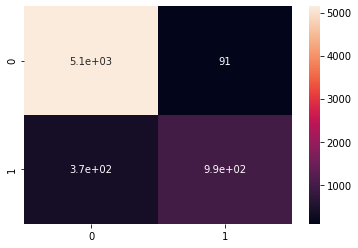

In [63]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
# Confusion matrix
cm = confusion_matrix(y_test, y_predict_test)
# Heatmap
sns.heatmap(cm, annot=True)

In [64]:
# Display the classification report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      5236
           1       0.92      0.73      0.81      1361

    accuracy                           0.93      6597
   macro avg       0.92      0.86      0.88      6597
weighted avg       0.93      0.93      0.93      6597



# Testing sample strings

In [65]:
input_text = ["lionel messi is a wonderful player"]

input_vector = func_tfidfvectorizer.transform(input_text)

print(input_vector)

  (0, 11402)	0.7590354969308826
  (0, 7675)	0.6510492411476171


In [66]:
result = NB_classifier.predict(input_vector)
print(result)

[0]
